# Теггирование видео


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='whitegrid',
        context='notebook',
        palette='deep')

In [5]:
data = pd.read_csv("../data/train_data_categories.csv", index_col=0)
taxonomy = pd.read_csv("../data/IAB_tags.csv")

In [6]:
data.sample(5)

,title,description,tags
video_id,,,
4c866aa742af11c4cf04867167c80e40,Антон Протеинов I #29 I Самые дорогие виды спорта,В этом выпуске легенда спорта Антон Протеинов ...,Массовая культура: Юмор и сатира
0d1a9fa41857d58c005ccde4ca517685,Тебе не кажется | Выпуск 2 | Артем Дятлов. Бул...,В этом выпуске «Тебе не кажется» гостем стал б...,"Семья и отношения, Медицина: Медицинские напра..."
269910b058386ce77d1a8caa32012127,PykoJob | Выпуск 7 | Тема ночного города,В этом выпуске ведущая Алиса и дизайнер Наталь...,Дом и сад: Дизайн интерьера
7b62e32cf8684b72e31657e9c1ef0ca8,Тру ДЕТЕКТОР I #7,Вы смотрите шоу с детектором лжи «Тру ДЕТЕКТОР...,Массовая культура: Юмор и сатира
9b7a478e54005e2cc0e31d7bbae28a7f,«МузЛофт-Подкаст» с Гулькиной — 4 декабря в 15...,"Подписывайся, чтобы не пропустить!","Массовая культура, Музыка и аудио"


In [7]:
data = data.dropna(subset=['tags'])
data.shape

(1048, 3)

In [11]:
data.describe()

,title,description,tags
count,1048,1048,1048
unique,1043,1007,234
top,Смешная история | Выпуск 2,"Подписывайся, чтобы не пропустить!",Массовая культура: Юмор и сатира
freq,2,21,224


In [12]:
taxonomy.head(5)

,Уровень 1 (iab),Уровень 2 (iab),Уровень 3 (iab)
0,Транспорт,NaN,NaN
1,Транспорт,Типы кузова автомобиля,NaN
2,Транспорт,Типы кузова автомобиля,Грузовой автомобиль
3,Транспорт,Типы кузова автомобиля,Седан
4,Транспорт,Типы кузова автомобиля,Универсал


In [13]:
taxonomy.describe()

,Уровень 1 (iab),Уровень 2 (iab),Уровень 3 (iab)
count,610,581,251
unique,29,329,248
top,Спорт,Промышленность и сфера услуг,Аксессуары
freq,64,33,3


In [14]:
data['tags_list'] = data['tags'].apply(lambda x: x.split(','))
data['num_tags'] = data['tags_list'].apply(len)

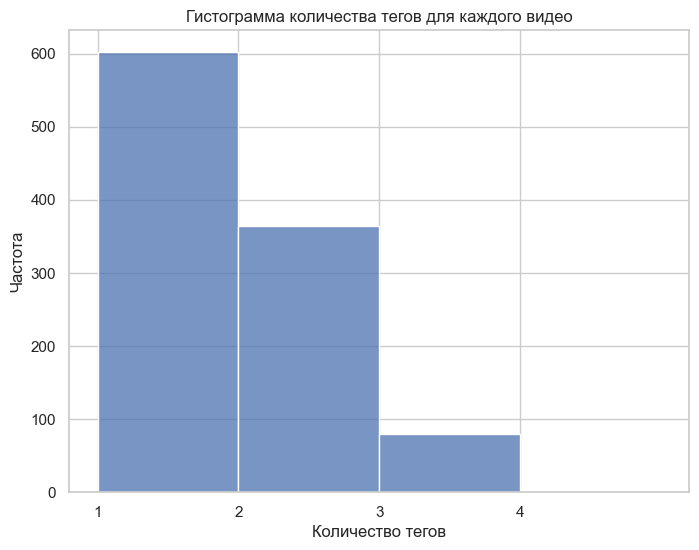

In [15]:
plt.figure(figsize=(8, 6))
sns.histplot(data['num_tags'], bins=range(1, data['num_tags'].max() + 2), kde=False)
plt.title('Гистограмма количества тегов для каждого видео')
plt.xlabel('Количество тегов')
plt.ylabel('Частота')
plt.xticks(range(1, data['num_tags'].max() + 1))
plt.show()

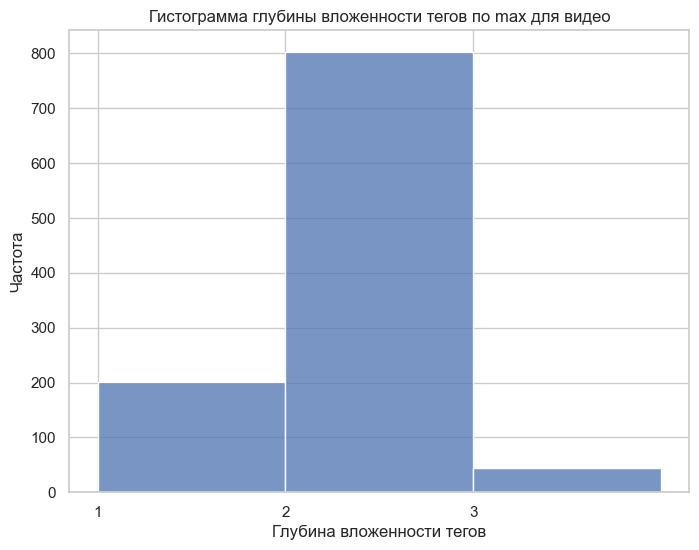

In [16]:
def get_tag_depth(tags):
    return max([tag.count(':') + 1 for tag in tags])

data['tag_depth'] = data['tags_list'].apply(get_tag_depth)

# Построение гистограммы глубины вложенности
plt.figure(figsize=(8, 6))
sns.histplot(data['tag_depth'], kde=False, bins=range(1, data['tag_depth'].max() + 2))
plt.title('Гистограмма глубины вложенности тегов по max для видео')
plt.xlabel('Глубина вложенности тегов')
plt.ylabel('Частота')
plt.xticks(range(1, data['tag_depth'].max() + 1))
plt.show()

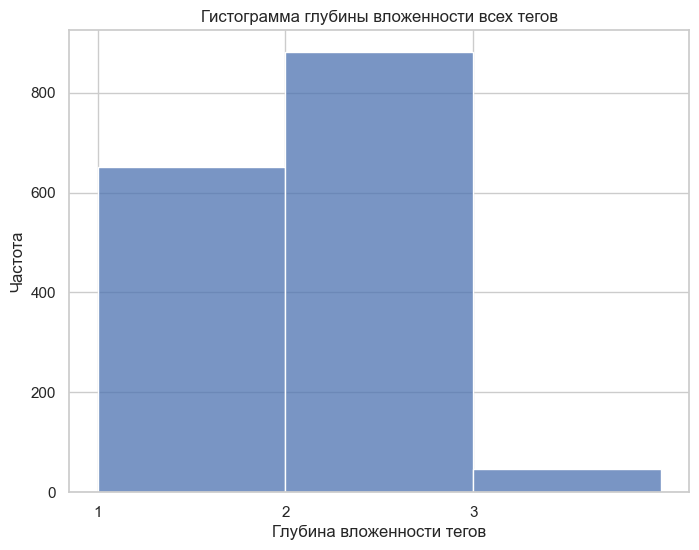

In [17]:
def get_tag_depths(tags):
    return [tag.count(':') + 1 for tag in tags]

all_tag_depths = data['tags_list'].apply(get_tag_depths).explode()

# Построение гистограммы глубины вложенности всех тегов
plt.figure(figsize=(8, 6))
sns.histplot(all_tag_depths, kde=False, bins=range(1, max(all_tag_depths) + 2))
plt.title('Гистограмма глубины вложенности всех тегов')
plt.xlabel('Глубина вложенности тегов')
plt.ylabel('Частота')
plt.xticks(range(1, max(all_tag_depths) + 1))
plt.show()


C:\Users\avo_m\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


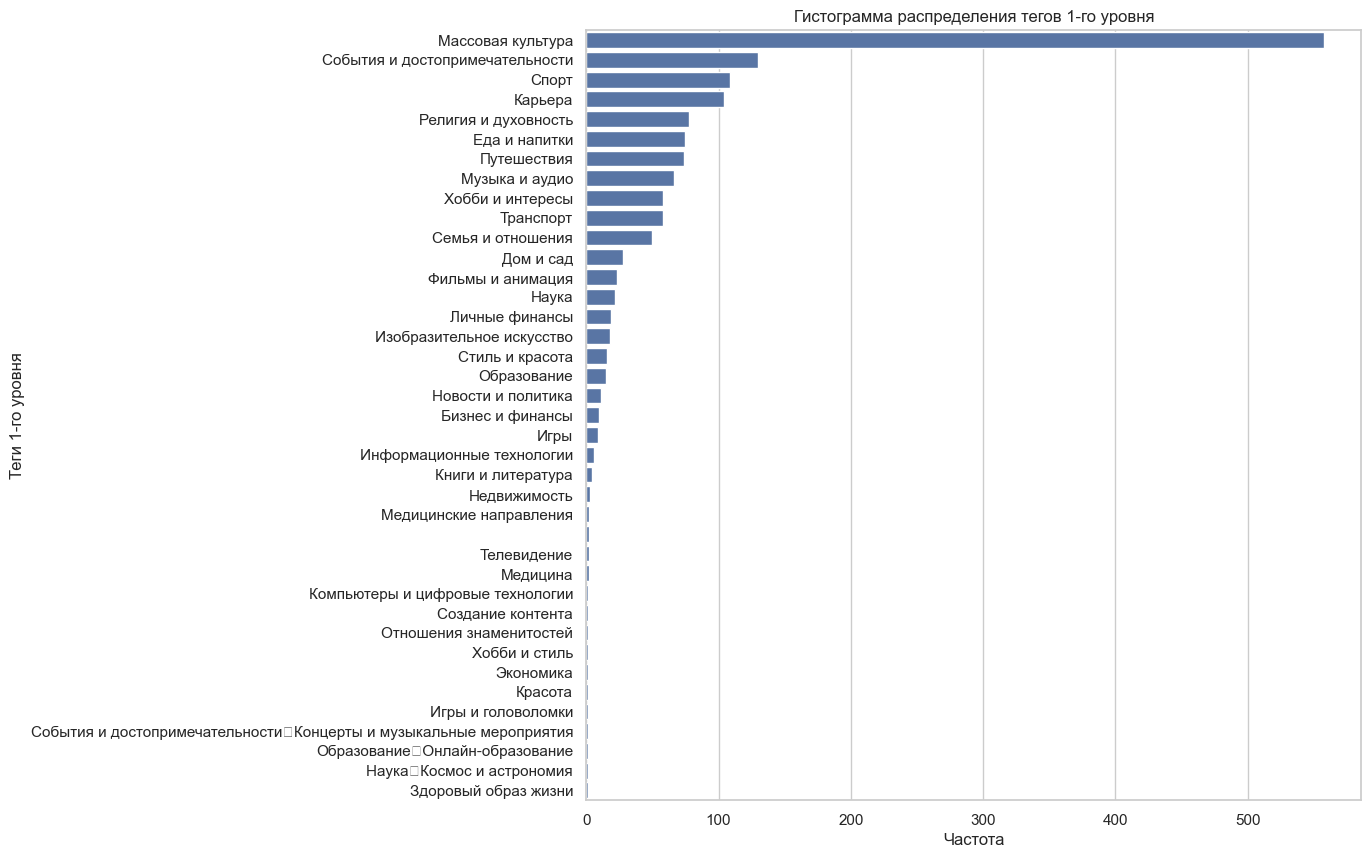

In [18]:
# Разделим каждый тег по ":", и выберем только первый уровень
data['tags_level_1'] = data['tags_list'].apply(lambda tags: set([tag.split(':')[0].strip() for tag in tags]))

# "Распаковываем" все теги 1-го уровня в один список
all_tags_level_1 = data['tags_level_1'].explode()

# Построение гистограммы частоты встречаемости тегов 1-го уровня
plt.figure(figsize=(10, 10))
sns.countplot(y=all_tags_level_1, order=all_tags_level_1.value_counts().index)
plt.title('Гистограмма распределения тегов 1-го уровня')
plt.xlabel('Частота')
plt.ylabel('Теги 1-го уровня')
plt.show()


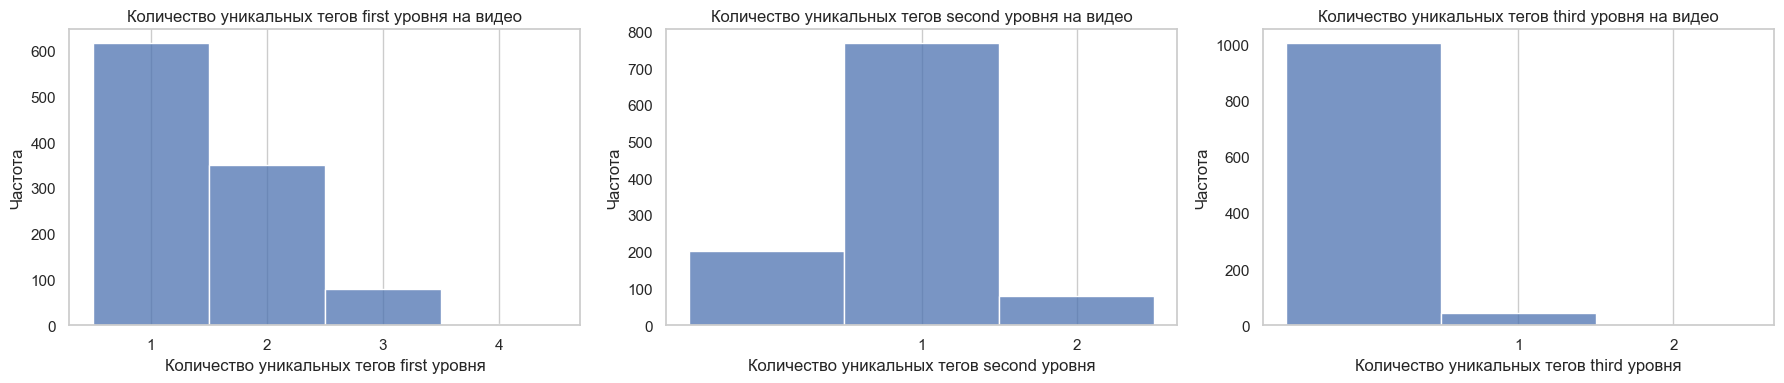

In [19]:
# Функция для подсчета уникальных тегов по уровням
def extract_cnt_unique_tags(tags, level):
    unique_tags = set()
    for tag in tags.split(','):
        parts = tag.split(':')
        if len(parts) > level:
            unique_tags.add(parts[level].strip())
    return len(unique_tags)

# Применяем функцию к столбцу с тегами
data['num_unique_first_level_tags'] = data['tags'].apply(lambda x: extract_cnt_unique_tags(x, 0))
data['num_unique_second_level_tags'] = data['tags'].apply(lambda x: extract_cnt_unique_tags(x, 1))
data['num_unique_third_level_tags'] = data['tags'].apply(lambda x: extract_cnt_unique_tags(x, 2))

# Визуализация
fig, axs = plt.subplots(1, 3, figsize=(18, 4))

levels = ['first', 'second', 'third']
for i, (level, ax) in enumerate(zip(levels, axs)):
    sns.histplot(data[f'num_unique_{level}_level_tags'],
                 bins=range(1, data[f'num_unique_{level}_level_tags'].max() + 2),
                 discrete=True, ax=ax)
    ax.set_title(f'Количество уникальных тегов {level} уровня на видео')
    ax.set_xlabel(f'Количество уникальных тегов {level} уровня')
    ax.set_ylabel('Частота')
    ax.set_xticks(range(1, data[f'num_unique_{level}_level_tags'].max() + 1))
    ax.grid(axis='y')

plt.tight_layout()
plt.show()
